# Exploratory Data Analysis (EDA) for Big Mart Outlets Sales Data

The data scientists at BigMart have collected 2013 sales data for 1,559 products across 10 stores in different cities. Additionally, they have defined various attributes for each product and store. The goal is to perform an Exploratory Data Analysis (EDA) to gain insights into the data and to understand the underlying patterns.

Note: Follow the comments which are given in the cells.

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load the dataset

In [25]:
# Read the dataset
df = pd.read_csv("BigMart_sales.csv")


In [26]:
# check the data avaiable in the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

### Check shape of the dataset:

* It is a good idea to first check the shape of the dataset.

In [27]:
# print the shape
df.shape

(8523, 12)

Now, we can see that the dataset contains 8523 rows and 12 columns.

### Summary of dataset

In [28]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Check the data types of columns
* The above df.info() command gives us the number of filled values along with the data types of columns.

* If we simply want to check the data type of a particular column, we can use the following command.

In [29]:
# datatypes of columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Statistical properties of dataset

In [30]:
# statistical properties of dataset
df.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


**Important points to note**
1. The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

2. If we want to view the statistical properties of character variables, we should run the following command -

`df.describe(include=['object'])`

3. If we want to view the statistical properties of all the variables, we should run the following command -

`df.describe(include='all')`

In [31]:
# statistical properties of dataset( use include = 'all)
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### View column names

In [32]:
# check the columns
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Here, the target variable is Item_Outlet_Sales.

In [33]:
# Check Duplicates
df.duplicated().sum()

0

### Missing values

In [34]:
# Use isnull() to find the null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
# Calculate the percentage of missing values

missing_percentage = (df.isnull().sum()/len(df))*100
# Print the result
print(missing_percentage)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


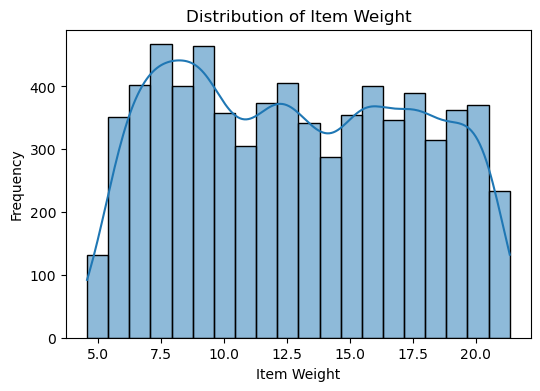

In [36]:
# Distribution of Item_Weight
plt.figure(figsize=(6, 4))
sns.histplot(df['Item_Weight'],kde=True,bins=20)
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

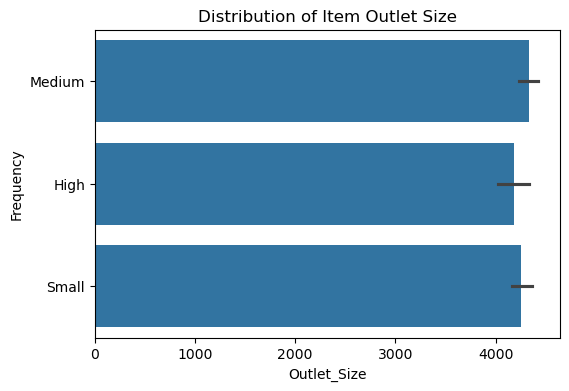

In [37]:
# Distribution of Outlet_Size
plt.figure(figsize=(6, 4))
sns.barplot(df['Outlet_Size'])
plt.title('Distribution of Item Outlet Size')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')
plt.show()

Here, the data is uniformly distributed. Directly imputing 1463, 2410 missing values with the mean or median in numerical column and mode in categorical column would introduce bias into the dataset.

One potential solution is to use a more advanced imputation technique such as K-nearest neighbors (KNN) imputation. With KNN imputation, missing values are filled based on the values of the nearest neighbors in the feature space.

You will learn these topics in future classes. For now, we will move on to the next steps of the EDA.

## Univariate Analysis

### Distribution of Target Variable

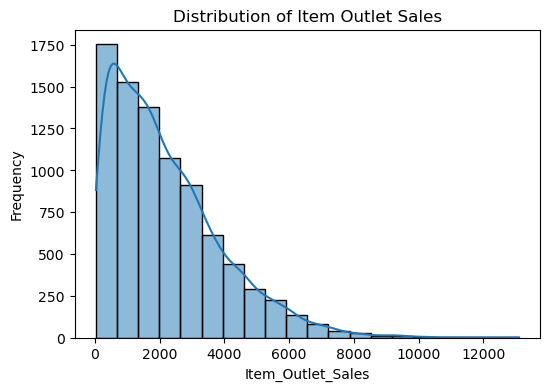

In [38]:
# Distribution of Item_Outlet_Sales
plt.figure(figsize=(6, 4))
sns.histplot(df['Item_Outlet_Sales'],kde=True,bins=20)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

You can observe the above distribution is right skewed.

Now, try to find the number of distinct values in all the columns.

In [39]:
# Number of distinct elements in each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [40]:
# Value counts of all columns
for i in df.columns:
    print(df[i].value_counts())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks  

Something is odd in Item_Fat_Content. Explore the Item_Fat_Content column seperately.

In [41]:
# Value counts of Item_Fat_Content column
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Correct the spelling mistakes of the Low Fat and Regular categories.

In [42]:
# Modidy 'LF' to 'Low Fat', 'low fat' to 'Low Fat' and 'reg' = 'Regular'
df = df.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}})
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
# Check the Item_Fat_Content value counts
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Categorical Variable Analysis

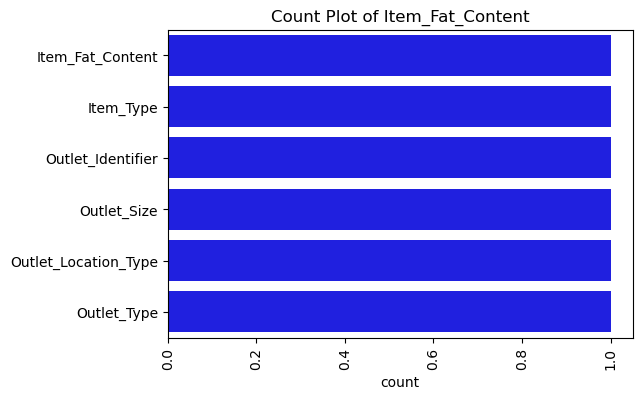

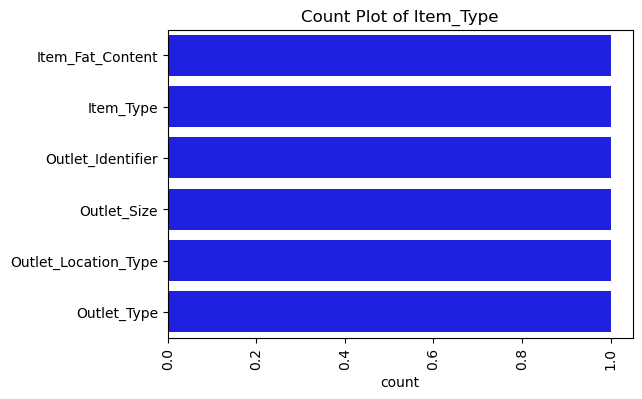

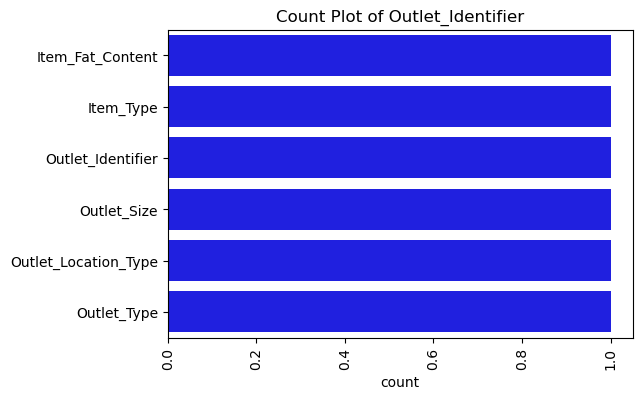

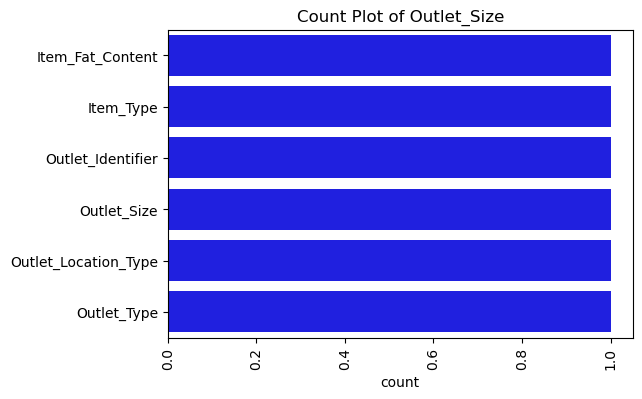

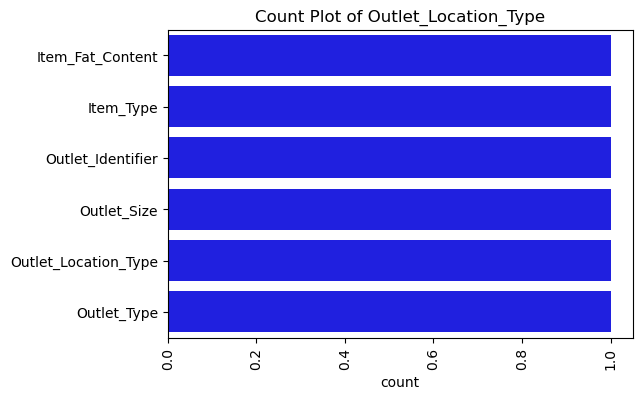

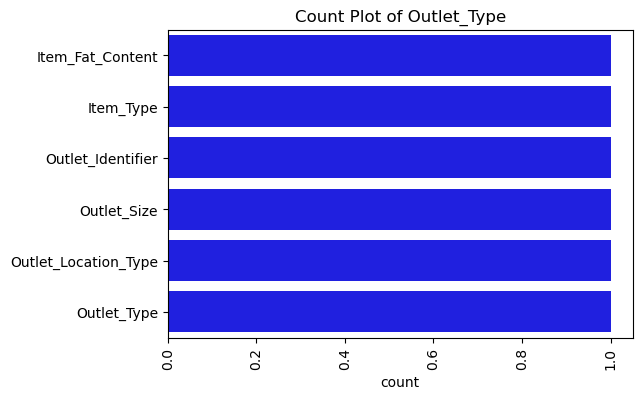

In [44]:
# Count plots for categorical variables
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))

    sns.countplot(categorical_columns, color='b')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()


## Bivariate Analysis

### Correlation Heatmap

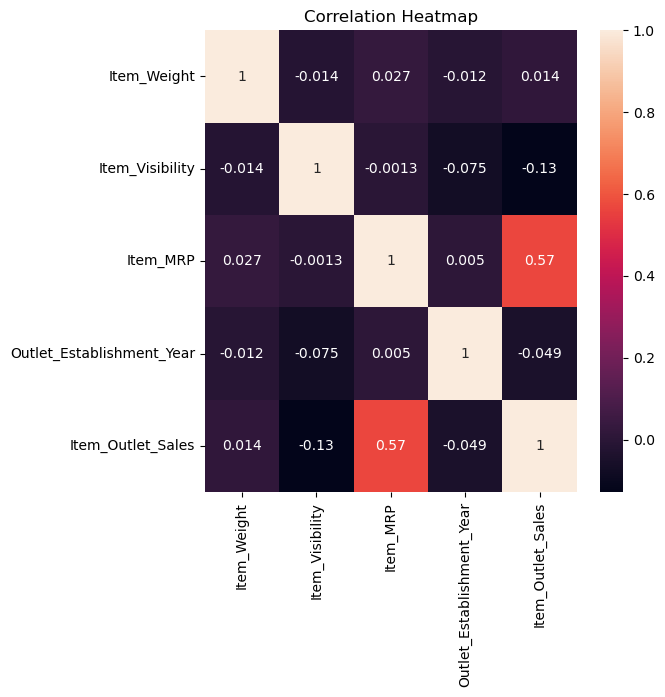

In [45]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(6, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


### Item_Weight vs Item_Outlet_Sales

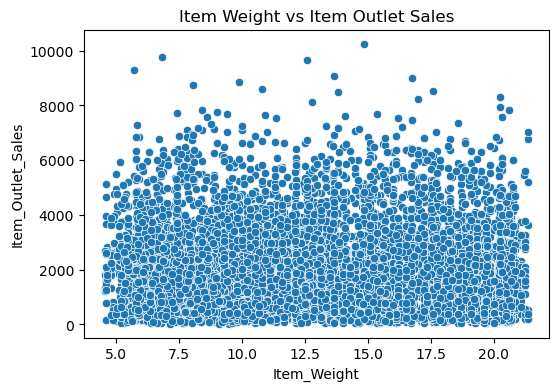

In [46]:
# Scatter plot
plt.figure(figsize=(6, 4))

sns.scatterplot(x=df.Item_Weight,y=df.Item_Outlet_Sales)
plt.title('Item Weight vs Item Outlet Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

### Item_MRP vs Item_Outlet_Sales

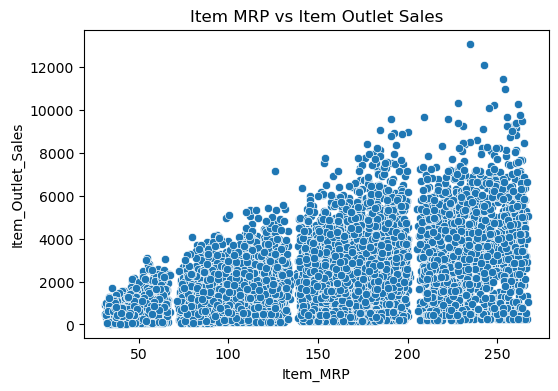

In [47]:
# Scatter plot
plt.figure(figsize=(6, 4))

sns.scatterplot(x=df.Item_MRP,y=df.Item_Outlet_Sales)

plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

### Categorical Variables vs Item_Outlet_Sales

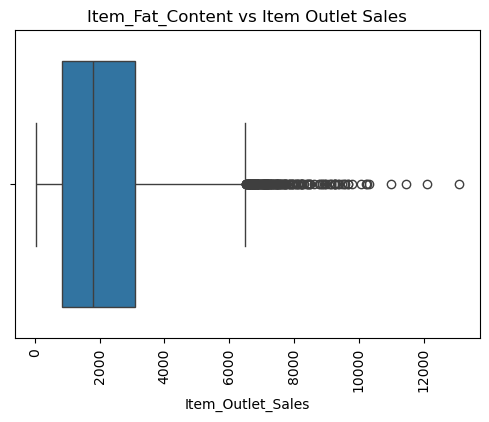

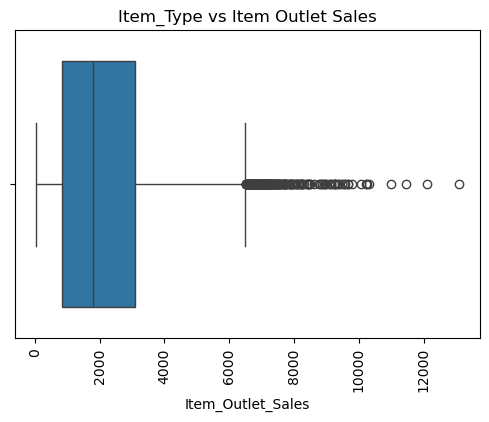

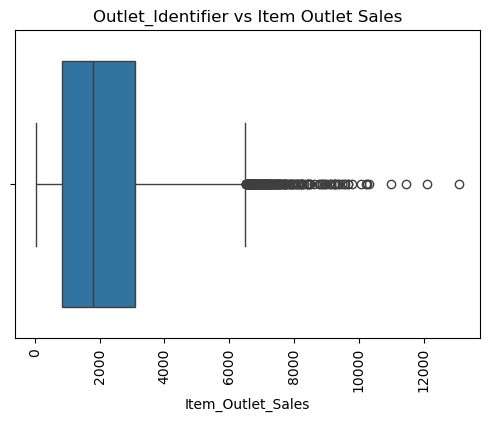

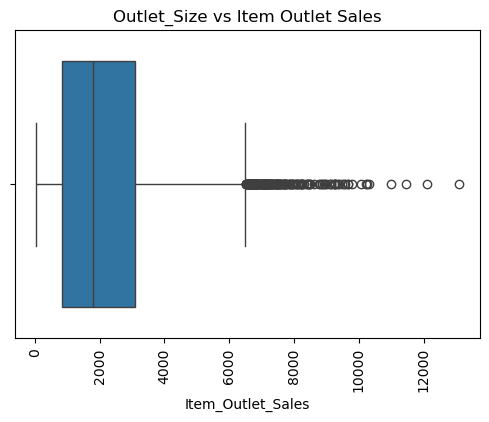

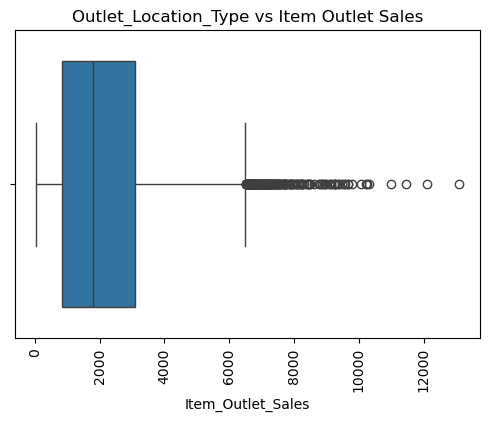

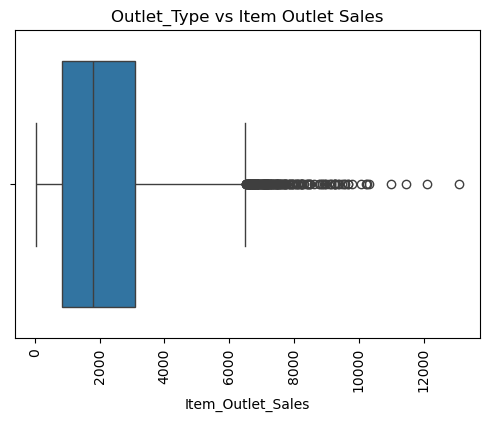

In [48]:
# Box plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(6, 4))

    sns.boxplot(data=df,x='Item_Outlet_Sales')
    plt.title(f'{col} vs Item Outlet Sales')
    plt.xticks(rotation=90)
    plt.show()

## Multivariate Analysis

### Pairplot

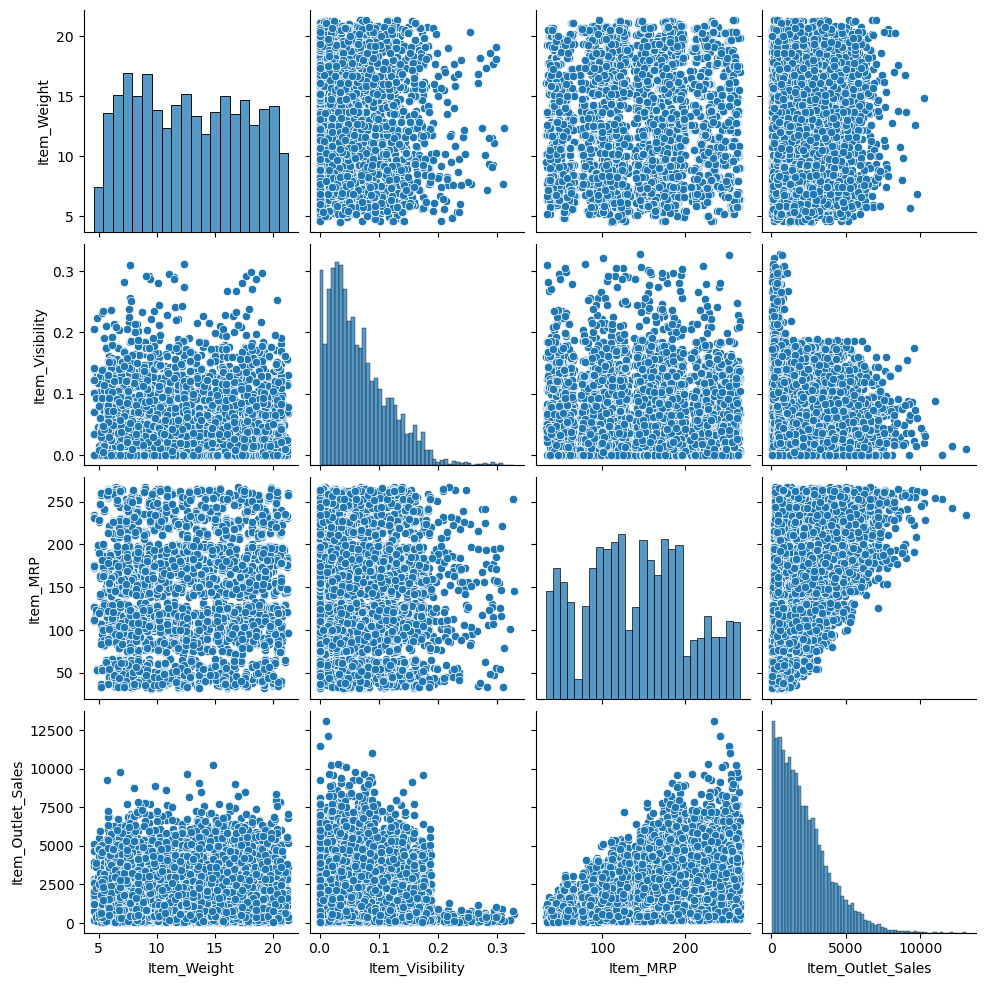

In [49]:
# Pairplot for selected features
selected_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
sns.pairplot(data=df,vars = selected_features)
plt.show()


### Multivariate Analysis with Categorical Variables

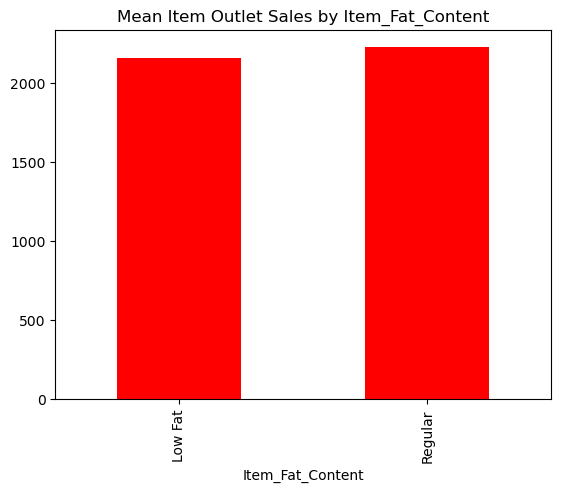

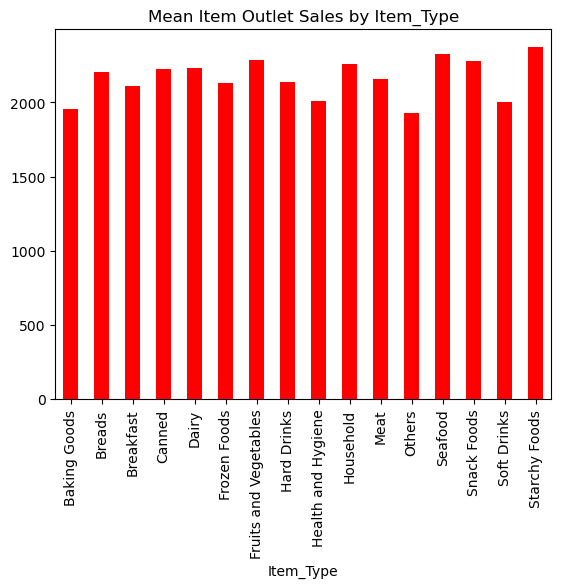

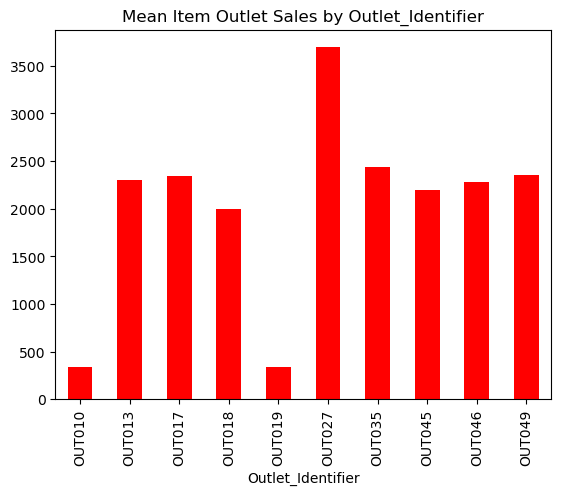

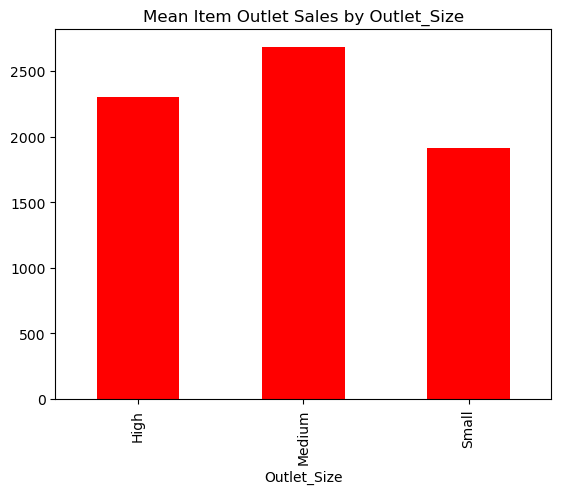

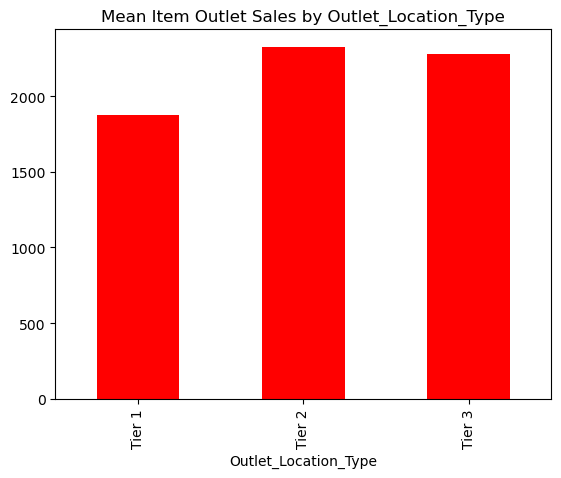

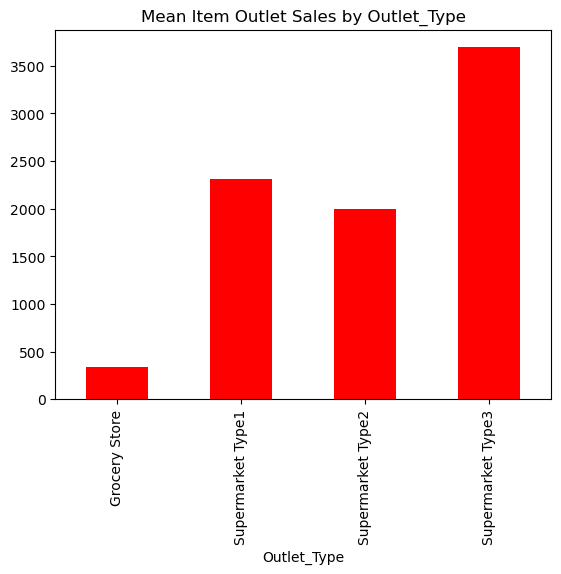

In [51]:
# Using groupby to see the mean sales by different categories
for col in categorical_columns:


    mean_sales = df.groupby(col)['Item_Outlet_Sales'].mean()
    mean_sales.plot(kind='bar',color="red")
    
    plt.title(f'Mean Item Outlet Sales by {col}')
    plt.xticks(rotation=90)
    plt.show()
